# HR Analytics
### A classification problem to understand the HR datasets and find which employee can leave the company

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data set
hr_df = pd.read_csv('datasets-11142-15488-HR_comma_sep.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# descriptive statistics
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# Display class values
hr_df.left.value_counts().sort_index()

0    11428
1     3571
Name: left, dtype: int64

Text(0, 0.5, 'left')

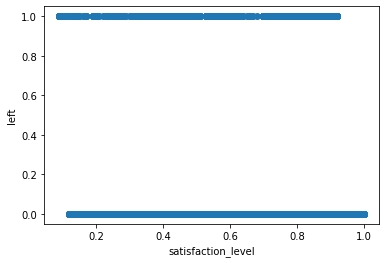

In [5]:
# plot satisfaction level VS left the company
plt.scatter(hr_df.satisfaction_level, hr_df.left)
plt.xlabel('satisfaction_level')
plt.ylabel('left')

In [6]:
# different datatypes
hr_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [7]:
# categorical columns
print(hr_df.Department.unique())
print(hr_df.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [8]:
cat_hr_df = pd.get_dummies(hr_df, columns=['Department','salary'])

In [9]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X = cat_hr_df.drop('left', axis=1)
y = hr_df.left
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [10]:
from sklearn.linear_model import LogisticRegression
# Fit logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000)
logistic_model = logistic_model.fit(X_train, y_train)

In [11]:
# Observe class predictions on test set
y_pred = logistic_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [12]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.accuracy_score(y_test, y_pred))

0.7602222222222222


In [13]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.confusion_matrix(y_test, y_pred))

[[2575  833]
 [ 246  846]]


In [14]:
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      3408
           1       0.50      0.77      0.61      1092

    accuracy                           0.76      4500
   macro avg       0.71      0.77      0.72      4500
weighted avg       0.81      0.76      0.77      4500



### Based on the model we can predict 75% times correctly the employee attrition.

### Required more modification for the model like Feature engineering and handle class imbalance
#### As we saw their is class imbalance so we need to handle the class imbalance and train the model.

In [15]:
# distribution of class
cat_hr_df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [16]:
# columns in dataframe
print(cat_hr_df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')


In [17]:
# dtypes of the features
print(cat_hr_df.dtypes)

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Department_IT               uint8
Department_RandD            uint8
Department_accounting       uint8
Department_hr               uint8
Department_management       uint8
Department_marketing        uint8
Department_product_mng      uint8
Department_sales            uint8
Department_support          uint8
Department_technical        uint8
salary_high                 uint8
salary_low                  uint8
salary_medium               uint8
dtype: object


In [18]:
# oversample the lower class
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [19]:
y_smote.value_counts()

1    11428
0    11428
Name: left, dtype: int64

In [20]:
# split train and test
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote,y_smote,train_size=0.7)

In [21]:
from sklearn.linear_model import LogisticRegression
# Fit logistic regression model
logistic_model_smote = LogisticRegression(class_weight='balanced',max_iter=1000)
logistic_model_smote = logistic_model_smote.fit(X_smote_train, y_smote_train)

In [22]:
# Observe class predictions on test set
y_smote_pred = logistic_model_smote.predict(X_smote_test)
y_smote_pred

array([1, 0, 0, ..., 0, 1, 1])

In [23]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.accuracy_score(y_smote_test, y_smote_pred))

0.803120898352049


In [24]:
print(metrics.confusion_matrix(y_smote_test, y_smote_pred))

[[2721  735]
 [ 615 2786]]


In [25]:
print(metrics.classification_report(y_smote_test, y_smote_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3456
           1       0.79      0.82      0.80      3401

    accuracy                           0.80      6857
   macro avg       0.80      0.80      0.80      6857
weighted avg       0.80      0.80      0.80      6857



### Based on the new model using oversampling of class we can predict 80% times correctly the employee attrition.

In [26]:
logistic_model_smote.predict(np.array([0.412, 0.487, 2, 136, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]).reshape(1,-1))

array([1])

In [27]:
np.array([0.412, 0.487, 2, 136, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]).reshape(1,-1)

array([[  0.412,   0.487,   2.   , 136.   ,   3.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   1.   ,   0.   ,   0.   ,   0.   ,   1.   ]])

In [28]:
logistic_model_smote.predict_proba(np.array([0.412, 0.487, 2, 136, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]).reshape(1,-1))

array([[0.35975686, 0.64024314]])

In [29]:
pred_proba_df = pd.DataFrame(logistic_model_smote.predict_proba(X_smote_test))
threshold_list = [0.25,0.4,0.5,0.6,.75]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_smote_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_smote_test,y_smote_test_pred.iloc[:,1])
    print('Our testing accuracy is {}'.format(test_accuracy))


******** For i = 0.25 ******
Our testing accuracy is 0.7484322590053959

******** For i = 0.4 ******
Our testing accuracy is 0.7943707160565845

******** For i = 0.5 ******
Our testing accuracy is 0.803120898352049

******** For i = 0.6 ******
Our testing accuracy is 0.7943707160565845

******** For i = 0.75 ******
Our testing accuracy is 0.7080355840746683


### Insight: Changing the threshold doesnot make much different in accuracy so we will contiue with 0.50

In [30]:
cat_hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
cat_hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.081805,0.052470,...,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.082472,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.274077,0.222981,...,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.275092,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
cat_hr_df.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Department_IT               uint8
Department_RandD            uint8
Department_accounting       uint8
Department_hr               uint8
Department_management       uint8
Department_marketing        uint8
Department_product_mng      uint8
Department_sales            uint8
Department_support          uint8
Department_technical        uint8
salary_high                 uint8
salary_low                  uint8
salary_medium               uint8
dtype: object

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cat_hr_df[['number_project','average_montly_hours','time_spend_company']] = scaler.fit_transform(cat_hr_df[['number_project','average_montly_hours','time_spend_company']])

In [34]:
cat_hr_df[['number_project','average_montly_hours','time_spend_company']].head()

,number_project,average_montly_hours,time_spend_company
0,0.0,0.285047,0.125
1,0.6,0.775701,0.500
2,1.0,0.822430,0.250
3,0.6,0.593458,0.375
4,0.0,0.294393,0.125


In [35]:
cat_hr_df.number_project.value_counts()

0.4    4365
0.2    4055
0.6    2761
0.0    2388
0.8    1174
1.0     256
Name: number_project, dtype: int64

In [36]:
cat_hr_df.time_spend_company.value_counts()

0.125    6443
0.000    3244
0.250    2557
0.375    1473
0.500     718
1.000     214
0.625     188
0.750     162
Name: time_spend_company, dtype: int64

In [37]:
cat_hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,0.0,0.285047,0.125,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,0.6,0.775701,0.500,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,1.0,0.822430,0.250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,0.6,0.593458,0.375,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,0.0,0.294393,0.125,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
cat_hr_df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [39]:
# oversample the lower class
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [40]:
y_smote.value_counts()

1    11428
0    11428
Name: left, dtype: int64

In [41]:
# split train and test
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote,y_smote,train_size=0.7)

In [42]:
from sklearn.linear_model import LogisticRegression
# Fit logistic regression model
logistic_model_smote = LogisticRegression(class_weight='balanced',max_iter=1000)
logistic_model_smote = logistic_model_smote.fit(X_smote_train, y_smote_train)

In [43]:
# Observe class predictions on test set
y_smote_pred = logistic_model_smote.predict(X_smote_test)
y_smote_pred

array([1, 0, 1, ..., 1, 0, 0])

In [44]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.accuracy_score(y_smote_test, y_smote_pred))

0.8041417529531866


In [45]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.confusion_matrix(y_smote_test, y_smote_pred))

[[2696  764]
 [ 579 2818]]


In [46]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.classification_report(y_smote_test, y_smote_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3460
           1       0.79      0.83      0.81      3397

    accuracy                           0.80      6857
   macro avg       0.80      0.80      0.80      6857
weighted avg       0.81      0.80      0.80      6857



In [47]:
pred_proba_df = pd.DataFrame(logistic_model_smote.predict_proba(X_smote_test))
threshold_list = [0.25,0.4,0.5,0.6,.75]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_smote_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_smote_test,y_smote_test_pred.iloc[:,1])
    print('Our testing accuracy is {}'.format(test_accuracy))


******** For i = 0.25 ******
Our testing accuracy is 0.7433279859997083

******** For i = 0.4 ******
Our testing accuracy is 0.7945165524281755

******** For i = 0.5 ******
Our testing accuracy is 0.8041417529531866

******** For i = 0.6 ******
Our testing accuracy is 0.7956832434009042

******** For i = 0.75 ******
Our testing accuracy is 0.7118273297360361


In [48]:
pred_proba_df.head()

,0,1
0,0.161536,0.838464
1,0.673603,0.326397
2,0.465215,0.534785
3,0.766706,0.233294
4,0.380406,0.619594


## Min Max Scaling not helping much to improve the accuracy of the model.